<a href="https://colab.research.google.com/github/nestoredduardo/data-analysis-production/blob/main/An%C3%A1lisisProducci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np

print('Libraries installed')

Libraries installed


## Retrieving data from Github repository
URL = 'https://raw.githubusercontent.com/NedduJS/data-analysis-production/main/production-data.xlsx'

In [32]:
URL = 'https://raw.githubusercontent.com/nestoredduardo/data-analysis-production/main/production-data.xlsx'
df = pd.read_excel(URL)
df

,Real Production,Accumulated Real Production,Scheduled Production,Accumulated Scheduled Production,Anual Capacity,Weekly Capacity,Waste Kg
0,0.000000,NaN,0.0,NaN,8000000.0,0.000000e+00,0.000000
1,0.000000,NaN,0.0,NaN,8000000.0,0.000000e+00,0.000000
2,0.000000,NaN,0.0,NaN,8000000.0,0.000000e+00,0.000000
3,0.000000,NaN,0.0,NaN,8000000.0,0.000000e+00,0.000000
4,0.000000,NaN,0.0,NaN,8000000.0,0.000000e+00,0.000000
5,3143.998885,3.143999e+03,50000.0,50000.0,8000000.0,2.285714e+05,1476.051755
6,39187.998451,4.233200e+04,50000.0,100000.0,8000000.0,4.571429e+05,12043.176994
7,79031.993186,1.213640e+05,50000.0,150000.0,8000000.0,6.857143e+05,22994.727933
8,75291.763790,1.966558e+05,50000.0,200000.0,8000000.0,9.142857e+05,21967.632568
9,84920.551343,2.815763e+05,75000.0,275000.0,8000000.0,1.142857e+06,24178.608274


We can see the data has zero and Nan values at the beginning and at the end of the table.
Therefore let's work with the period that has data.

## Cleaning data

In [33]:
df = df[(df != 0).all(1)]

## Preparing data for analysis

In order to analyse the data we need:



1.   Change the units of waste to Lbs, because the production data is given in that unit
2.   Calculate the cumulative waste in lbs

3.   Add relevant KPIs for the production analysis: 

*   Efficiency
*   Effectiveness
*   Usability
*   Waste %
*   Quality





1.   Changing the units of waste to Lbs, because the production data is given in that unit

In [34]:
kg_lbs = 2.2046

In [35]:
df.insert(7,"Waste Lbs", df['Waste Kg']*kg_lbs)

2. Calculate the cumulative waste in lbs

In [54]:
df.insert(8,'Accumulated Waste Lbs', df['Waste Lbs'].cumsum())
df.head()

ValueError: ignored

3. Add relevant KPIs for the production analysis(%):


*   Efficiency = Accumulated Real Production / Accumulated Scheduled Production
*   Effectiveness = Accumulated Real Production / Weekly Capacity
*   Usability = (Accumulated Real Production + Accumulated Waste Lbs) / Weekly Capacity    
*   Waste % = Accumulated Waste Lbs / Accumulated Scheduled Production
*   Quality = Accumulated Waste Lbs / Accumulated Real Production









In [37]:
df.insert(9,'Efficiency', df['Accumulated Real Production'] / df['Accumulated Scheduled Production'] *100)
df.insert(10,'Effectiveness', df['Accumulated Real Production'] / df['Weekly Capacity'] * 100)
df.insert(11,'Usability', (df['Accumulated Real Production'] + df['Accumulated Waste Lbs'])/df['Weekly Capacity'] *100)
df.insert(12,'Waste %', df['Accumulated Waste Lbs'] / df['Accumulated Scheduled Production'] *100)
df.insert(13,'Quality',  (1 - df['Accumulated Waste Lbs'] / df['Accumulated Real Production'] )*100)

In [48]:
df.head()

,Real Production,Accumulated Real Production,Scheduled Production,Accumulated Scheduled Production,Anual Capacity,Weekly Capacity,Waste Kg,Waste Lbs,Accumulated Waste Lbs,Efficiency,Effectiveness,Usability,Waste %,Quality
5,3143.998885,3143.998885,50000.0,50000.0,8000000.0,2.285714e+05,1476.051755,3254.10370,3254.10370,6.287998,1.375500,2.799170,6.508207,-3.502063
6,39187.998451,42331.997336,50000.0,100000.0,8000000.0,4.571429e+05,12043.176994,26550.38800,29804.49170,42.331997,9.260124,15.779857,29.804492,29.593467
7,79031.993186,121363.990523,50000.0,150000.0,8000000.0,6.857143e+05,22994.727933,50694.17720,80498.66890,80.909327,17.698915,29.438304,53.665779,33.671702
8,75291.763790,196655.754313,50000.0,200000.0,8000000.0,9.142857e+05,21967.632568,48429.84276,128928.51166,98.327877,21.509223,35.610779,64.464256,34.439492
9,84920.551343,281576.305656,75000.0,275000.0,8000000.0,1.142857e+06,24178.608274,53304.15980,182232.67146,102.391384,24.637927,40.583285,66.266426,35.281248


## Data Analysis

### Compare real production vs scheduled production

---



In [39]:
import matplotlib.pyplot as plt

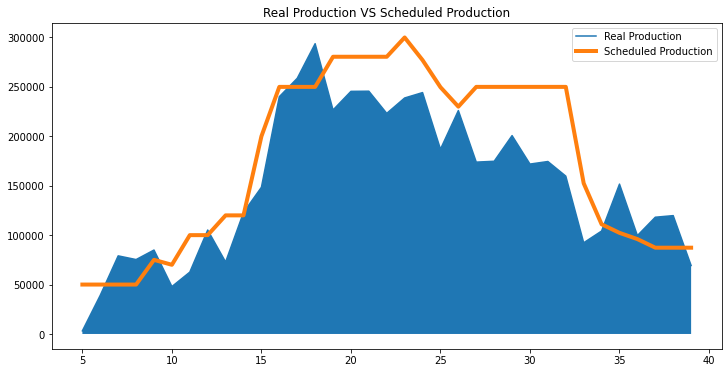

In [40]:
fig, ax = plt.subplots()

plt.title('Real Production VS Scheduled Production')

ax.plot(df.index, df['Real Production'], label='Real Production')
ax.fill_between(df.index,0,df['Real Production'])

ax.plot(df.index, df['Scheduled Production'], label='Scheduled Production', linewidth=4)

fig.set_figheight(6)
fig.set_figwidth(12)

leg= ax.legend()

Watching the figure above, the real production is most under the scheduled production. The company is not being effective.

### Cumulative production tracking

---



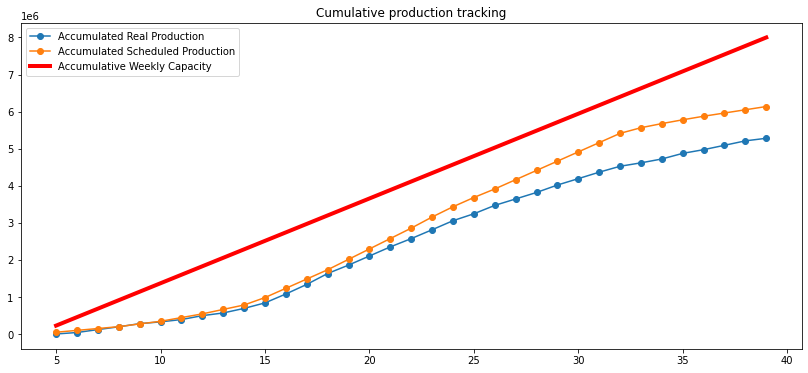

In [46]:
fig, ax = plt.subplots()

plt.title('Cumulative production tracking')

ax.plot(df.index, df['Accumulated Real Production'], label='Accumulated Real Production',marker='o')
ax.plot(df.index, df['Accumulated Scheduled Production'], label='Accumulated Scheduled Production', marker='o')
ax.plot(df.index, df['Weekly Capacity'], label='Accumulative Weekly Capacity', color='r', linewidth=4)

fig.set_figheight(6)
fig.set_figwidth(14)

leg= ax.legend()

### Production and Waste

---

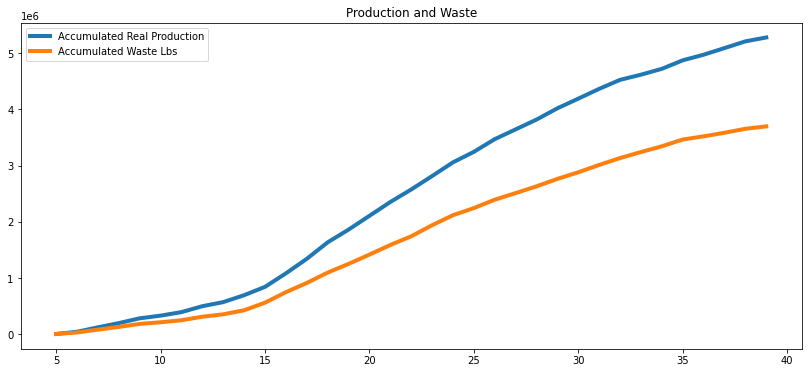

In [51]:
fig, ax = plt.subplots()

plt.title('Production and Waste')

ax.plot(df.index, df['Accumulated Real Production'], label='Accumulated Real Production',linewidth=4)
ax.plot(df.index, df['Accumulated Waste Lbs'], label='Accumulated Waste Lbs',linewidth=4)

fig.set_figheight(6)
fig.set_figwidth(14)

leg = ax.legend()

### Efficiency, Effectiveness and Usability

---

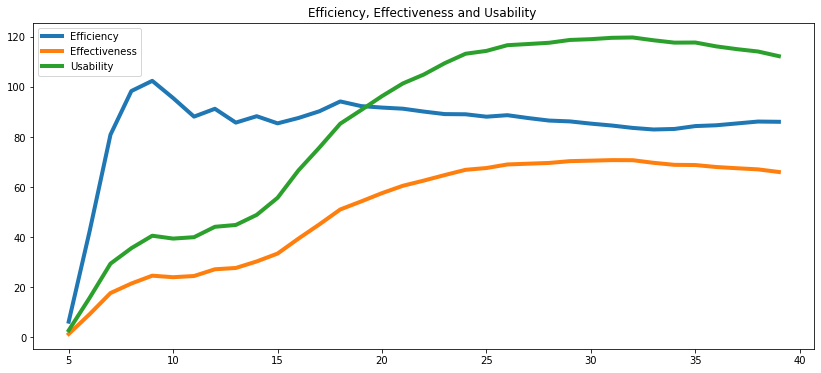

In [52]:
fig, ax = plt.subplots()

plt.title('Efficiency, Effectiveness and Usability ')

ax.plot(df.index, df['Efficiency'], label='Efficiency',linewidth=4)
ax.plot(df.index, df['Effectiveness'], label='Effectiveness',linewidth=4)
ax.plot(df.index, df['Usability'], label='Usability', linewidth=4)

fig.set_figheight(6)
fig.set_figwidth(14)

leg = ax.legend()

### Quality and Waste

---

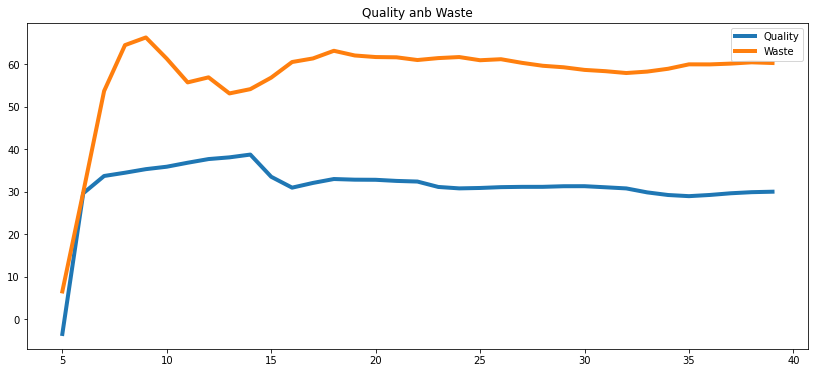

In [53]:
fig, ax = plt.subplots()

plt.title('Quality anb Waste')

ax.plot(df.index, df['Quality'], label='Quality',linewidth=4)
ax.plot(df.index, df['Waste %'], label='Waste',linewidth=4)

fig.set_figheight(6)
fig.set_figwidth(14)

leg = ax.legend()